### **FINAL PROJECT**
  
***Implementation association rule with Algoritma Apriori to Restaurant Transaction Data***


In this project, we will perform association rule mining using the Apriori algorithm to discover purchasing patterns of food items in a restaurant. This will help generate menu package recommendations to assist customers in selecting their meals.

The restaurant's transaction data can be obtained from the following link: https://www.kaggle.com/newshuntkannada/restaurant-transaction-data-to-implement-apriori.xGA2PH18.

In [ ]:
# Import Library

# Data Analysis
import numpy as np
import pandas as pd

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# apriori dan association_rules
from mlxtend.frequent_patterns import apriori, association_rules

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Text analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as FreqDist
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Import Dataset
df = pd.read_csv("/content/rawDataset.csv",sep=',')
df

,Transaction_ID,Customer_ID,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,ORDX0,490Rs,Bhuna - Chicken,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ORDX1,446Rs,Plain Rice,Bhuna - Chicken,,Special Fried Rice,Curry,Korma - Lamb,NaN,NaN,NaN
2,ORDX2,465Rs,Plain Rice,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORDX3,1126Rs,Bhuna - Chicken,House white wine 75cl,Special Fried Rice,Curry,Vindaloo - Prawn,NaN,NaN,NaN,NaN
4,ORDX4,435Rs,Plain Rice,,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10995,ORDX10995,652Rs,Plain Rice,House white wine 75cl,Special Fried Rice,Vindaloo - Prawn,NaN,NaN,NaN,NaN,NaN
10996,ORDX10996,769Rs,Bhuna - Chicken,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,NaN,NaN,NaN,NaN
10997,ORDX10997,685Rs,Plain Rice,,House white wine 75cl,Special Fried Rice,Korma - Lamb,NaN,NaN,NaN,NaN
10998,ORDX10998,485Rs,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,,Special Fried Rice,Curry,Vindaloo - Prawn,Korma - Lamb,NaN


In [ ]:
len(df)

11000

In [ ]:
df['Transaction_ID'].nunique()

11000

In [ ]:
df['Customer_ID'].nunique()

1081

That's make sense customer ID is not unique because of customer could make one or more transactions.


In [ ]:
# Checking null value in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  11000 non-null  object
 1   Customer_ID     11000 non-null  object
 2   M1              11000 non-null  object
 3   M2              11000 non-null  object
 4   M3              9447 non-null   object
 5   M4              7699 non-null   object
 6   M5              5721 non-null   object
 7   M6              3429 non-null   object
 8   M7              1399 non-null   object
 9   M8              304 non-null    object
 10  M9              34 non-null     object
dtypes: object(11)
memory usage: 945.4+ KB


In [ ]:
# Change white space value with NaN
df=df.replace(' ',np.NaN)
df

,Transaction_ID,Customer_ID,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,ORDX0,490Rs,Bhuna - Chicken,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ORDX1,446Rs,Plain Rice,Bhuna - Chicken,NaN,Special Fried Rice,Curry,Korma - Lamb,NaN,NaN,NaN
2,ORDX2,465Rs,Plain Rice,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORDX3,1126Rs,Bhuna - Chicken,House white wine 75cl,Special Fried Rice,Curry,Vindaloo - Prawn,NaN,NaN,NaN,NaN
4,ORDX4,435Rs,Plain Rice,NaN,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10995,ORDX10995,652Rs,Plain Rice,House white wine 75cl,Special Fried Rice,Vindaloo - Prawn,NaN,NaN,NaN,NaN,NaN
10996,ORDX10996,769Rs,Bhuna - Chicken,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,NaN,NaN,NaN,NaN
10997,ORDX10997,685Rs,Plain Rice,NaN,House white wine 75cl,Special Fried Rice,Korma - Lamb,NaN,NaN,NaN,NaN
10998,ORDX10998,485Rs,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,NaN,Special Fried Rice,Curry,Vindaloo - Prawn,Korma - Lamb,NaN


In [ ]:
df['M2'].unique()
#df['M1'].value_counts()['Plain Rice']
#print(df['M2'].value_counts()['Plain Rice'])
#print(df['M3'].value_counts()['Plain Rice'])
#print(df['M4'].value_counts()['Plain Rice'])
#print(df['M5'].value_counts()['Plain Rice'])
#print(df['M6'].value_counts()['Plain Rice'])
# print(df['M7'].value_counts()['Plain Rice'])
# print(df['M8'].value_counts()['Plain Rice'])
#print(df['M9'].value_counts()['Plain Rice'])

array(['Korma - Lamb', 'Bhuna - Chicken', 'Chicken Tikka Balti',
       'House white wine 75cl', nan, 'Vindaloo - Prawn', 'Lamb Biryani',
       'Curry', 'Special Fried Rice'], dtype=object)

In [ ]:
# Checking How many unique menu in the restaurant
pd.concat([df['M1'],df['M2'],df['M3'],df['M4'],df['M5'],df['M6'],df['M7'],df['M8'],df['M9']]).unique()

array(['Bhuna - Chicken', 'Plain Rice', nan, 'House white wine 75cl',
       'Chicken Tikka Balti', 'Special Fried Rice', 'Curry',
       'Lamb Biryani', 'Vindaloo - Prawn', 'Korma - Lamb'], dtype=object)

The result show there are 9 menu in restaurant.

In [ ]:
# Make function to categorize menu
# Bhuna - Chicken
def conditions1(df):
    if (df["M1"] == "Bhuna - Chicken") or (df["M2"] == "Bhuna - Chicken") or (df["M3"] == "Bhuna - Chicken") or (df["M4"] == "Bhuna - Chicken") or (df["M5"] == "Bhuna - Chicken") or (df["M6"] == "Bhuna - Chicken") or (df["M7"] == "Bhuna - Chicken") or (df["M8"] == "Bhuna - Chicken") or (df["M9"] == "Bhuna - Chicken"):
        return "Bhuna - Chicken"
    else:
        return np.NaN

# Chicken Tikka Balti
def conditions2(df):
    if (df["M1"] == "Chicken Tikka Balti") or (df["M2"] == "Chicken Tikka Balti") or (df["M3"] == "Chicken Tikka Balti") or (df["M4"] == "Chicken Tikka Balti") or (df["M5"] == "Chicken Tikka Balti") or (df["M6"] == "Chicken Tikka Balti") or (df["M7"] == "Chicken Tikka Balti") or (df["M8"] == "Chicken Tikka Balti") or (df["M9"] == "Chicken Tikka Balti"):
        return "Chicken Tikka Balti"
    else:
        return np.NaN

# Curry
def conditions3(df):
    if (df["M1"] == "Curry") or (df["M2"] == "Curry") or (df["M3"] == "Curry") or (df["M4"] == "Curry") or (df["M5"] == "Curry") or (df["M6"] == "Curry") or (df["M7"] == "Curry") or (df["M8"] == "Curry") or (df["M9"] == "Curry"):
        return "Curry"
    else:
        return np.NaN

# House white wine 75cl
def conditions4(df):
    if (df["M1"] == "House white wine 75cl") or (df["M2"] == "House white wine 75cl") or (df["M3"] == "House white wine 75cl") or (df["M4"] == "House white wine 75cl") or (df["M5"] == "House white wine 75cl") or (df["M6"] == "House white wine 75cl") or (df["M7"] == "House white wine 75cl") or (df["M8"] == "House white wine 75cl") or (df["M9"] == "House white wine 75cl"):
        return "House white wine 75cl"
    else:
        return np.NaN

# Korma - Lamb
def conditions5(df):
    if (df["M1"] == "Korma - Lamb") or (df["M2"] == "Korma - Lamb") or (df["M3"] == "Korma - Lamb") or (df["M4"] == "Korma - Lamb") or (df["M5"] == "Korma - Lamb") or (df["M6"] == "Korma - Lamb") or (df["M7"] == "Korma - Lamb") or (df["M8"] == "Korma - Lamb") or (df["M9"] == "Korma - Lamb"):
        return "Korma - Lamb"
    else:
        return np.NaN

# Lamb Biryani
def conditions6(df):
    if (df["M1"] == "Lamb Biryani") or (df["M2"] == "Lamb Biryani") or (df["M3"] == "Lamb Biryani") or (df["M4"] == "Lamb Biryani") or (df["M5"] == "Lamb Biryani") or (df["M6"] == "Lamb Biryani") or (df["M7"] == "Lamb Biryani") or (df["M8"] == "Lamb Biryani") or (df["M9"] == "Lamb Biryani"):
        return "Lamb Biryani"
    else:
        return np.NaN

# Plain Rice
def conditions7(df):
    if (df["M1"] == "Plain Rice") or (df["M2"] == "Plain Rice") or (df["M3"] == "Plain Rice") or (df["M4"] == "Plain Rice") or (df["M5"] == "Plain Rice") or (df["M6"] == "Plain Rice") or (df["M7"] == "Plain Rice") or (df["M8"] == "Plain Rice") or (df["M9"] == "Plain Rice"):
        return "Plain Rice"
    else:
        return np.NaN

# Special Fried Rice
def conditions8(df):
    if (df["M1"] == "Special Fried Rice") or (df["M2"] == "Special Fried Rice") or (df["M3"] == "Special Fried Rice") or (df["M4"] == "Special Fried Rice") or (df["M5"] == "Special Fried Rice") or (df["M6"] == "Special Fried Rice") or (df["M7"] == "Special Fried Rice") or (df["M8"] == "Special Fried Rice") or (df["M9"] == "Special Fried Rice"):
        return "Special Fried Rice"
    else:
        return np.NaN

# Vindaloo - Prawn
def conditions9(df):
    if (df["M1"] == "Vindaloo - Prawn") or (df["M2"] == "Vindaloo - Prawn") or (df["M3"] == "Vindaloo - Prawn") or (df["M4"] == "Vindaloo - Prawn") or (df["M5"] == "Vindaloo - Prawn") or (df["M6"] == "Vindaloo - Prawn") or (df["M7"] == "Vindaloo - Prawn") or (df["M8"] == "Vindaloo - Prawn") or (df["M9"] == "Vindaloo - Prawn"):
        return "Vindaloo - Prawn"
    else:
        return np.NaN


In [ ]:
# Add new column for 9 menus with apply the functions
df['Bhuna - Chicken'] =  df.apply(conditions1, axis=1)
df['Chicken Tikka Balti'] =  df.apply(conditions2, axis=1)
df['Curry'] =  df.apply(conditions3, axis=1)
df['House white wine 75cl'] =  df.apply(conditions4, axis=1)
df['Korma - Lamb'] =  df.apply(conditions5, axis=1)
df['Lamb Biryani'] =  df.apply(conditions6, axis=1)
df['Plain Rice'] =  df.apply(conditions7, axis=1)
df['Special Fried Rice'] =  df.apply(conditions8, axis=1)
df['Vindaloo - Prawn'] =  df.apply(conditions9, axis=1)

In [ ]:
# Make new dataframe that contains the menu colomn
data = df[['Bhuna - Chicken', 'Chicken Tikka Balti','Curry','House white wine 75cl','Korma - Lamb','Lamb Biryani','Plain Rice','Special Fried Rice','Vindaloo - Prawn']]
data

,Bhuna - Chicken,Chicken Tikka Balti,Curry,House white wine 75cl,Korma - Lamb,Lamb Biryani,Plain Rice,Special Fried Rice,Vindaloo - Prawn
0,Bhuna - Chicken,NaN,NaN,NaN,Korma - Lamb,NaN,NaN,NaN,NaN
1,Bhuna - Chicken,NaN,Curry,NaN,Korma - Lamb,NaN,Plain Rice,Special Fried Rice,NaN
2,NaN,Chicken Tikka Balti,NaN,NaN,NaN,NaN,Plain Rice,NaN,NaN
3,Bhuna - Chicken,NaN,Curry,House white wine 75cl,NaN,NaN,NaN,Special Fried Rice,Vindaloo - Prawn
4,NaN,NaN,NaN,NaN,Korma - Lamb,NaN,Plain Rice,NaN,Vindaloo - Prawn
...,...,...,...,...,...,...,...,...,...
10995,NaN,NaN,NaN,House white wine 75cl,NaN,NaN,Plain Rice,Special Fried Rice,Vindaloo - Prawn
10996,Bhuna - Chicken,Chicken Tikka Balti,Curry,NaN,NaN,Lamb Biryani,NaN,Special Fried Rice,NaN
10997,NaN,NaN,NaN,House white wine 75cl,Korma - Lamb,NaN,Plain Rice,Special Fried Rice,NaN
10998,Bhuna - Chicken,Chicken Tikka Balti,Curry,NaN,Korma - Lamb,NaN,Plain Rice,Special Fried Rice,Vindaloo - Prawn


In [ ]:
data.columns

Index(['Bhuna - Chicken', 'Chicken Tikka Balti', 'Curry',
       'House white wine 75cl', 'Korma - Lamb', 'Lamb Biryani', 'Plain Rice',
       'Special Fried Rice', 'Vindaloo - Prawn'],
      dtype='object')

In [ ]:
# tidy data for association rules
data_dummy = pd.get_dummies(data)
data_dummy.columns = ['Bhuna - Chicken', 'Chicken Tikka Balti', 'Curry','House white wine 75cl','Korma - Lamb','Lamb Biryani','Plain Rice','Special Fried Rice','Vindaloo - Prawn']
data_dummy

,Bhuna - Chicken,Chicken Tikka Balti,Curry,House white wine 75cl,Korma - Lamb,Lamb Biryani,Plain Rice,Special Fried Rice,Vindaloo - Prawn
0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,1,1,0
2,0,1,0,0,0,0,1,0,0
3,1,0,1,1,0,0,0,1,1
4,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
10995,0,0,0,1,0,0,1,1,1
10996,1,1,1,0,0,1,0,1,0
10997,0,0,0,1,1,0,1,1,0
10998,1,1,1,0,1,0,1,1,1


Explanation:

* 0: item not purchased
* 1: item purchased

In [ ]:
# membangun model
frq_items = apriori(data_dummy, min_support=0.05,use_colnames=True)
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
frq_items.sort_values(by="support",ascending=False)

,support,itemsets,length
6,0.463091,(Plain Rice),1
2,0.462909,(Curry),1
7,0.462000,(Special Fried Rice),1
5,0.457727,(Lamb Biryani),1
3,0.456455,(House white wine 75cl),1
...,...,...,...
112,0.094636,"(Vindaloo - Prawn, House white wine 75cl, Korm...",3
79,0.094455,"(House white wine 75cl, Chicken Tikka Balti, K...",3
94,0.094455,"(Curry, House white wine 75cl, Korma - Lamb)",3
62,0.094091,"(Vindaloo - Prawn, House white wine 75cl, Bhun...",3


In [ ]:
# mengumpulkan aturan yag memenuhi dataframe
rules = association_rules(frq_items, metric="lift",min_threshold=1)
rules = rules.sort_values(['confidence','lift'],ascending=[False,False])
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
156,"(Bhuna - Chicken, Korma - Lamb)",(Special Fried Rice),0.205091,0.462000,0.102091,0.497784,1.077454,0.007339,1.071252,0.090433
411,"(House white wine 75cl, Korma - Lamb)",(Special Fried Rice),0.205909,0.462000,0.101727,0.494040,1.069350,0.006597,1.063325,0.081669
289,"(Lamb Biryani, Chicken Tikka Balti)",(Plain Rice),0.206909,0.463091,0.101636,0.491213,1.060726,0.005819,1.055272,0.072185
353,"(Curry, Korma - Lamb)",(Special Fried Rice),0.202818,0.462000,0.099545,0.490811,1.062362,0.005843,1.056583,0.073636
136,"(House white wine 75cl, Bhuna - Chicken)",(Special Fried Rice),0.206273,0.462000,0.100909,0.489202,1.058879,0.005611,1.053255,0.070056


In [ ]:
Total_sales = data_dummy.sum()
Total_sales = pd.DataFrame(Total_sales)
Total_sales = Total_sales.reset_index()
Total_sales.columns = ['Item','Total']
Total_sales = Total_sales.sort_values('Total',ascending= False)
Total_sales

,Item,Total
6,Plain Rice,5094
2,Curry,5092
7,Special Fried Rice,5082
5,Lamb Biryani,5035
3,House white wine 75cl,5021
0,Bhuna - Chicken,5005
8,Vindaloo - Prawn,4965
1,Chicken Tikka Balti,4934
4,Korma - Lamb,4852


Text(0.5, 1.0, 'Total sales of different Item')

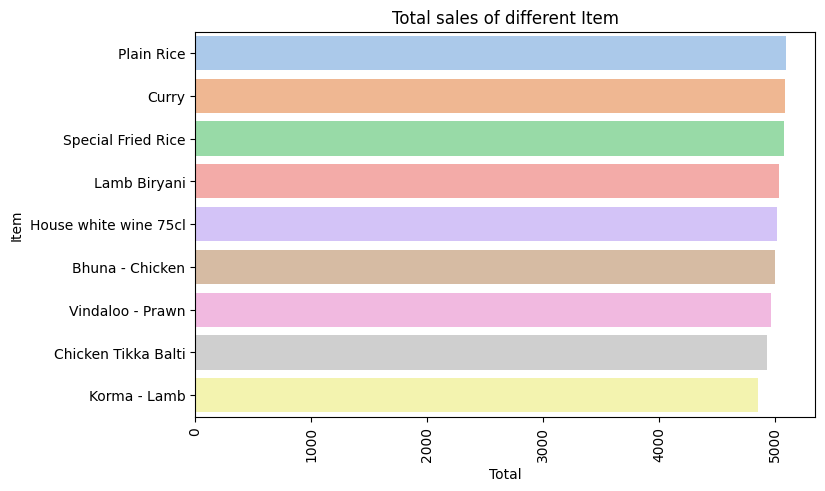

In [ ]:
#Plot data
plt.figure(figsize=(8,5))
sns.barplot(x= 'Total', y='Item', data = Total_sales, palette = 'pastel')
plt.xticks(rotation=90)
plt.title("Total sales of different Item")


The visualization show that The total sales for each item are not significantly different

In [ ]:
customer_plot = pd.DataFrame(df.groupby(['Customer_ID']).Customer_ID.count())
customer_plot.columns=['Total Transaksi']
customer_plot = customer_plot.reset_index()
customer_plot = customer_plot.sort_values(by='Total Transaksi', ascending =False)
customer_plot = customer_plot.head(15)
customer_plot

,Customer_ID,Total Transaksi
915,834Rs,22
896,815Rs,22
286,1286Rs,21
732,651Rs,21
931,850Rs,20
652,571Rs,20
64,1064Rs,19
526,445Rs,19
753,672Rs,19
362,1362Rs,18


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '834Rs'),
  Text(1, 0, '815Rs'),
  Text(2, 0, '1286Rs'),
  Text(3, 0, '651Rs'),
  Text(4, 0, '850Rs'),
  Text(5, 0, '571Rs'),
  Text(6, 0, '1064Rs'),
  Text(7, 0, '445Rs'),
  Text(8, 0, '672Rs'),
  Text(9, 0, '1362Rs'),
  Text(10, 0, '1293Rs'),
  Text(11, 0, '383Rs'),
  Text(12, 0, '686Rs'),
  Text(13, 0, '381Rs'),
  Text(14, 0, '784Rs')])

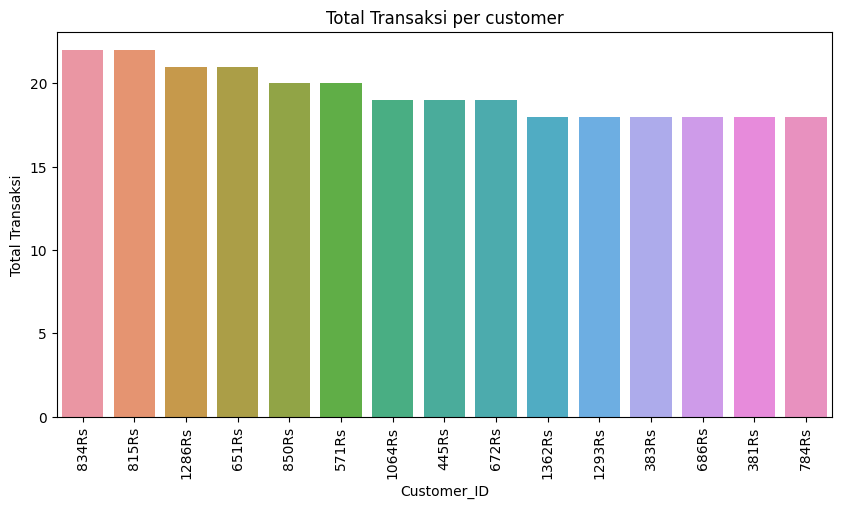

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x= 'Customer_ID', y='Total Transaksi', data = customer_plot)
plt.title('Total Transaksi per customer')
plt.xticks(rotation=90)

customer with customer ID 834Rs is the highest total transaction

In [ ]:
# visualisasi
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs lift')
)

fig.show()

Text(0.5, 1.0, 'lift vs Confidence')

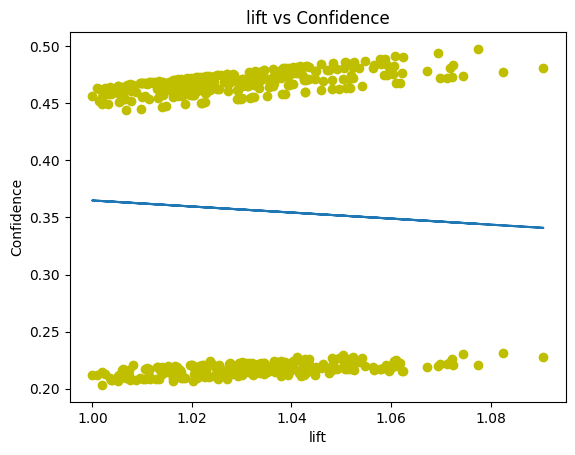

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

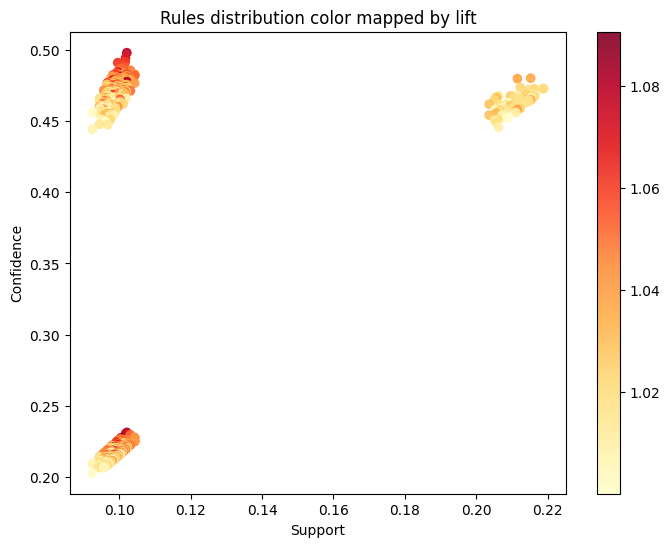

In [ ]:
# Visualizing the rules distribution color mapped by Lift
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

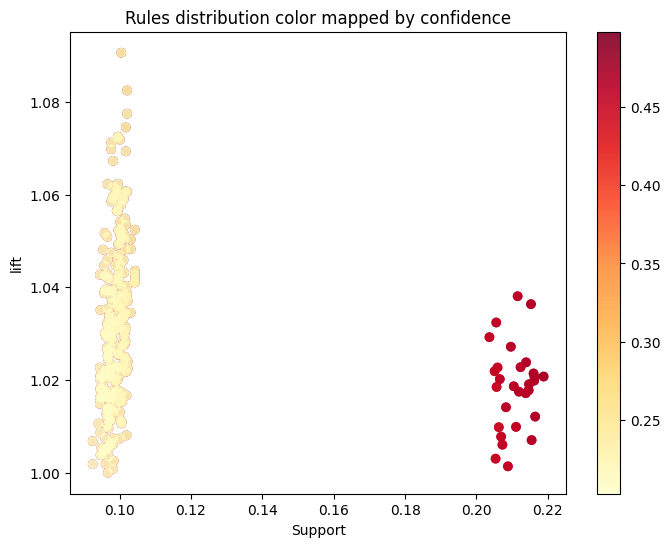

In [ ]:
# Visualizing the rules distribution color mapped by confidence
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['lift'], c=rules['confidence'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by confidence');
plt.xlabel('Support')
plt.ylabel('lift')
plt.colorbar();

#### **Conclusion**

Based on the analysis, the implementation rules on restaurant transaction data yields the following item pairs recomendations :
1. (Bhuna - Chicken, Korma - Lamb, Special fried rice)
2. (House white wine 75cl, Korma - Lamb, Special fried rice)
3. (Lamb biryani, Chicken tikka balti, Plain rice)
4. (Curry, Korma - Lamb, Special fried rice)
5. (House white wine 75cl, Bhuna chicken, Special fried rice)

The 5 recommended food menu packages are selected based on the highest confidence and lift values from the combinations obtained